1)  the objective of this analysis is to compare various models in order to determine the best strategy for preventing online payment fraud. 
Online payment frauds are indeed a highly severe business challenge as it  causes enormous losses for both businesses and customers.
The proposed model will enable the business to detect and prevent fraudulent transactions even before it occurence and this will definately make the business grow.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\modin\\Downloads\\Online Payment Fraud Detection.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


### Bivariate Analysis

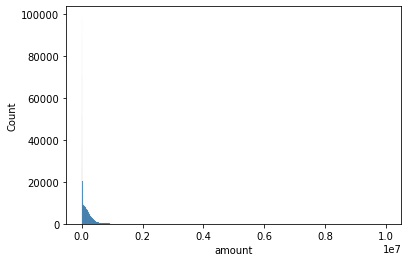

In [6]:
sns.histplot(data['amount']);

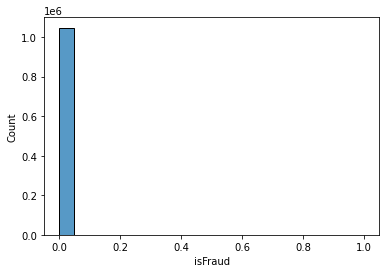

In [7]:
sns.histplot(data['isFraud']);

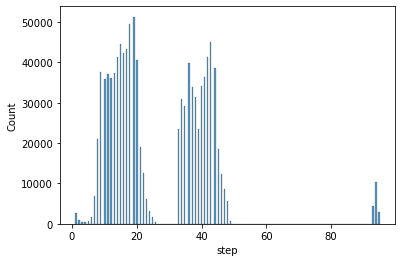

In [8]:
sns.histplot(data['step']);

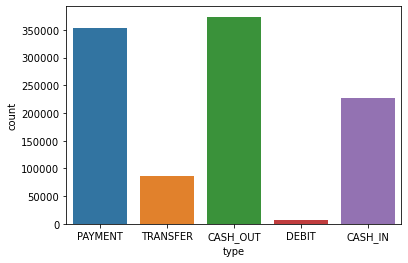

In [9]:
sns.countplot(x='type',data=data);

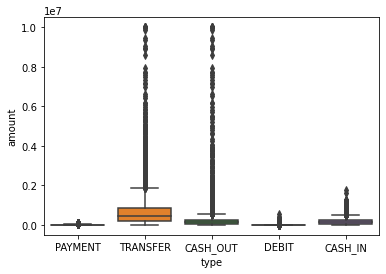

In [10]:
# multivariate analysis
sns.boxplot(x='type',y= 'amount',data=data);

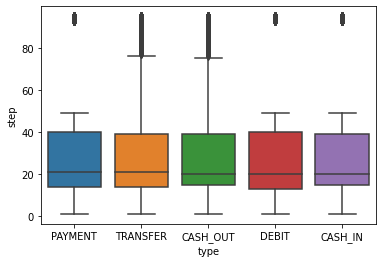

In [11]:
sns.boxplot(x='type',y= 'step',data=data);

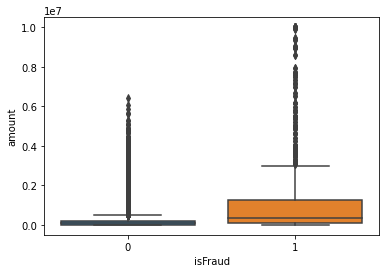

In [12]:
sns.boxplot(x='isFraud',y= 'amount',data=data);

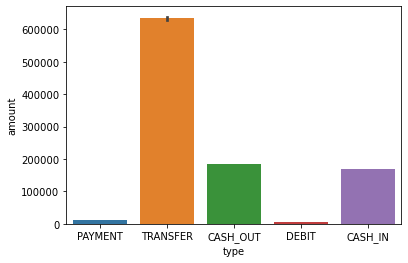

In [13]:
sns.barplot(x= 'type', y= 'amount', data = data);

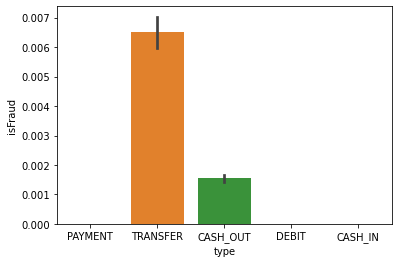

In [14]:
sns.barplot(x= 'type', y= 'isFraud', data = data);

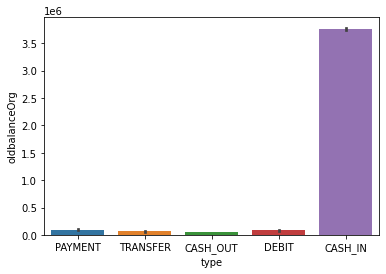

In [15]:
sns.barplot(x= 'type', y= 'oldbalanceOrg', data = data);

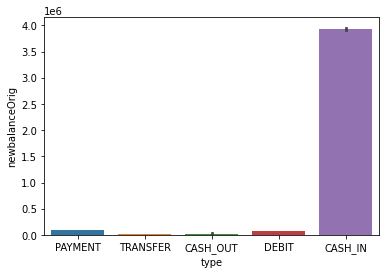

In [16]:
sns.barplot(x= 'type', y= 'newbalanceOrig', data = data);

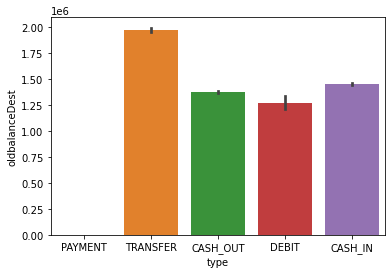

In [17]:
sns.barplot(x= 'type', y= 'oldbalanceDest', data = data);

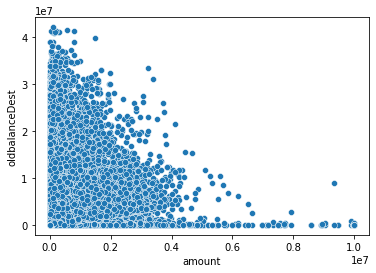

In [19]:
sns.scatterplot(x= 'amount', y= 'oldbalanceDest', data = data);

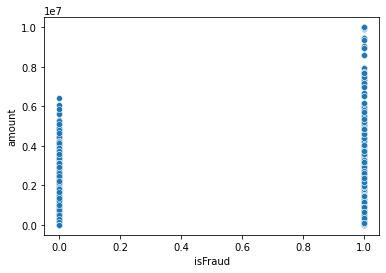

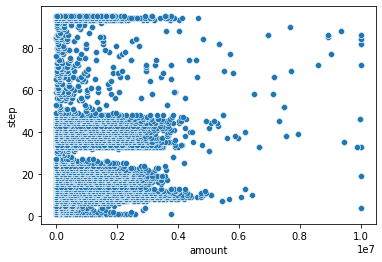

In [27]:
sns.scatterplot(x= 'amount', y= 'step', data = data);

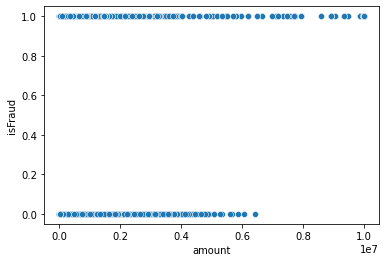

In [29]:
sns.scatterplot(x= 'amount', y= 'isFraud', data = data);

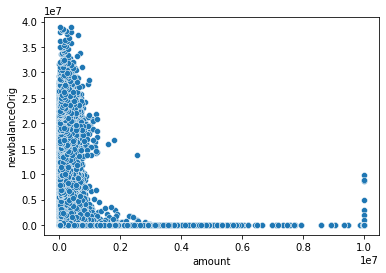

In [31]:
sns.scatterplot(x='amount', y= 'newbalanceOrig', data = data);

### Multivariate Analysis

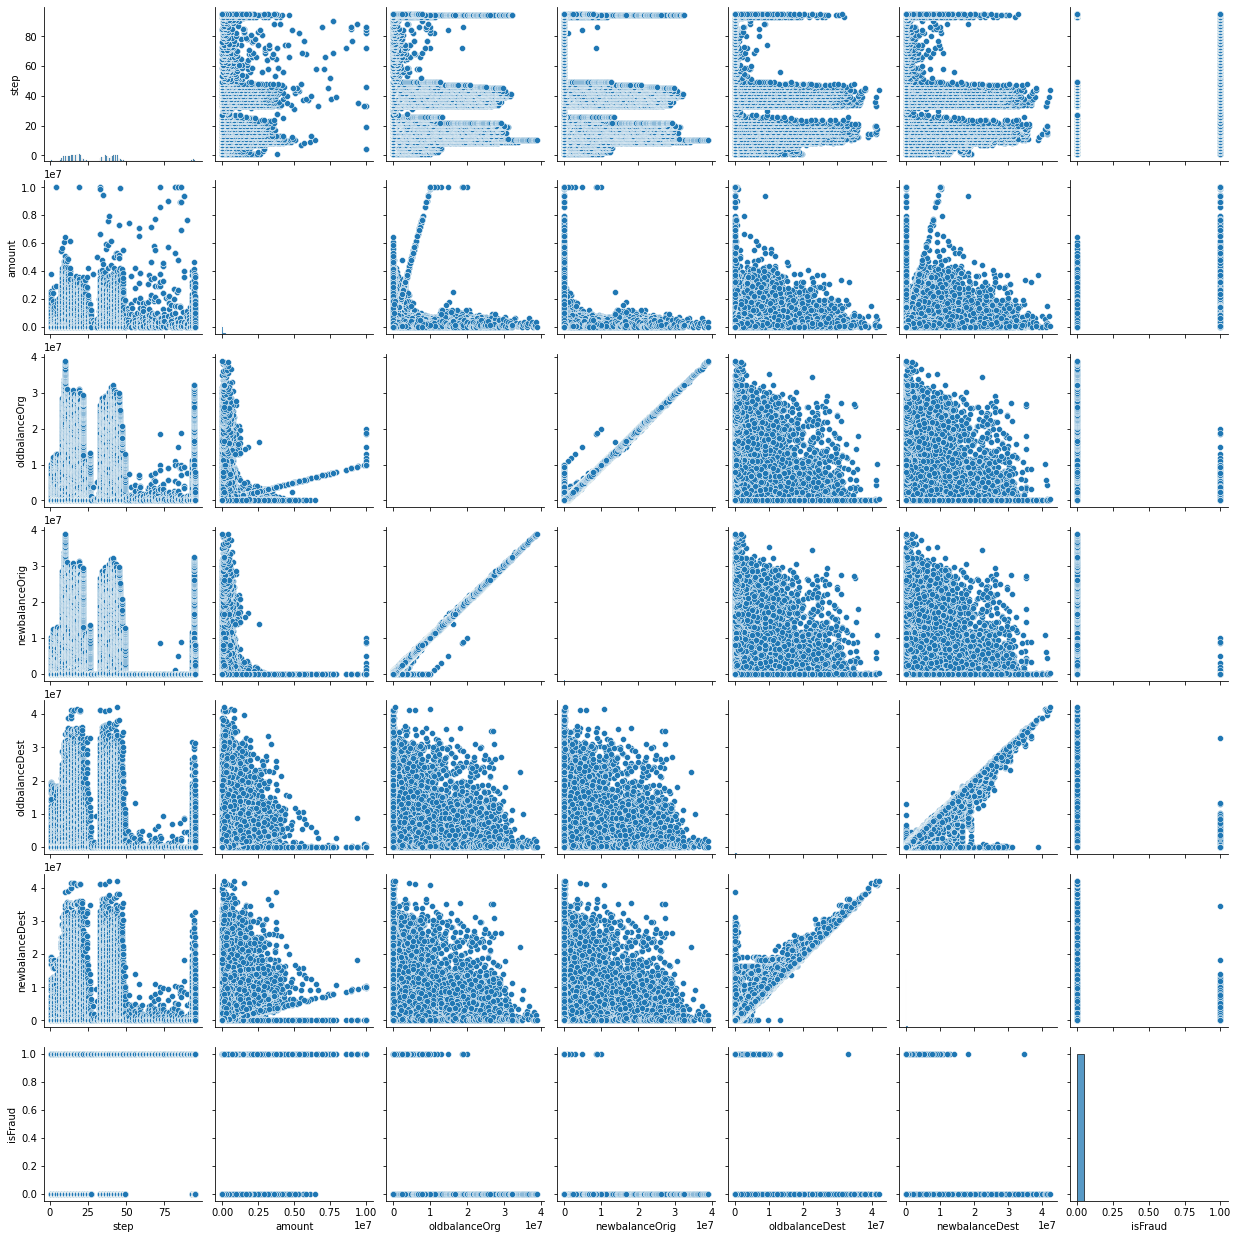

In [33]:
sns.pairplot(data);

Text(0.5, 1.0, 'Correlation')

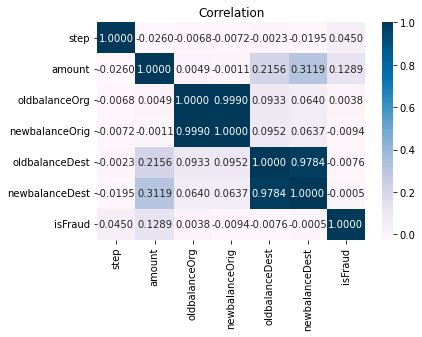

In [39]:
sns.heatmap(data.corr(), cbar=True, fmt='.4f', annot=True, cmap=plt.cm.PuBu)
plt.title('Correlation', fontsize=12)

### Data Preprocessing

In [34]:
#variable encoding
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [51]:
from sklearn import preprocessing

lee = preprocessing.LabelEncoder()
lee.fit(data['isFraud'])
data['isFraud'] = lee.transform(data['isFraud'])

In [52]:
#seperate target from datasets
target = data['isFraud']
data = data.drop(columns=['isFraud', 'type'], axis=1)

In [56]:
X = pd.get_dummies(data=X, prefix='type')

### Model Building

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
X = data[['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest']]
y = data[['isFraud']]
y = np.squeeze(y)

In [60]:
X = pd.get_dummies(data=X, prefix='type')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.70, random_state=1)

In [62]:
# scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [63]:
data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00


### Models

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.70, random_state=1)

In [65]:
print(X_train.shape)
print(x_test.shape)

(734002, 8)
(314573, 8)


In [76]:
models = {}

models['Random Forest'] = RandomForestClassifier(n_estimators=10)
models['Naive Bayes'] = GaussianNB()


accuracy, precision, recall, f1 = {}, {}, {}, {}

In [80]:
for key in models.keys():
    models[key].fit(X_train, y_train)
    pred = models[key].predict(X_valid)
    
    accuracy[key] = accuracy_score(pred, y_valid)
    precision[key] = precision_score(pred, y_valid)
    recall[key] = recall_score(pred, y_valid)
    f1[key] = f1_score(pred, y_valid)

In [81]:
data_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])

data_model['Accuracy'] = accuracy.values()
data_model['Precision'] = precision.values()
data_model['Recall'] = recall.values()
data_model['F1'] = f1.values()

data_model

,Accuracy,Precision,Recall,F1
Random Forest,0.999596,0.654434,0.938596,0.771171
Naive Bayes,0.988683,0.211009,0.020469,0.037317


### Conclusion

From the predicted results, It is evident that Random Forest is the best model to use for detecting fraudulent or non fraudulent transactions as it obtains the highest score.